## Thompson Sampling

**Bayesian Inference**

<img src='../../resources/reinforcement_learning/thompson_sampling/bayesian.png' />


**Thompson Sampling**

<img src='../../resources/reinforcement_learning/thompson_sampling/thompson_sampling.png' />


After we have run a few trial runs for 3 machines, we construct a distribution for each.
* We are constructing the distribution where we think the actual value might lie - We are recreating the possible ways that the machines are created & NOT trying to guess the distributions behind the machine.

<img src='../../resources/reinforcement_learning/thompson_sampling/thompson_sampling2.png' />

* Thompson Sampling is **probabilistic algorithm**.
* Then, the algorithm will pull a value from the distribution
    * Generated our own bandit configuration
* Pick the highest expected return out of all 3.
* After pulling the trigger for that machine, we get a returned value.
    * We have to then adjust to get it more and more refined.

<img src='../../resources/reinforcement_learning/thompson_sampling/thompson_sampling3.png' />


* Finally, it gets to a point that we refined a distribution based on the machine with the highest return.

<img src='../../resources/reinforcement_learning/thompson_sampling/thompson_sampling4.png' />


**Comparison between UCB & Thompson**
<img src='../../resources/reinforcement_learning/thompson_sampling/comparison.png' />

<hr />

### Implementing Thompson Sampling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

Finding best ad for the customers to click.

In [3]:
df = pd.read_csv('data/ads_ctr_optimisation.csv')

In [5]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing Thompson Sampling

In [20]:
N = 500 # Total number of users/rounds
d = 10 # Number of ads
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = np.random.beta(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

### Visualizations

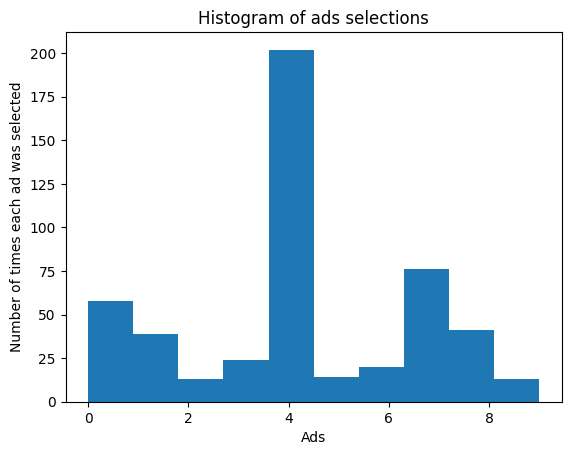

In [21]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected');